In [1]:
from causallearn.utils.GraphUtils import GraphUtils
import pydot_ng as pydot
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io
import pandas as pd

In [2]:
df = pd.read_csv("bpi2017_final.csv")
df.head()

,case:concept:name,NumberOfOffers,Action,org:resource,concept:name,EventOrigin,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,...,CreditScore,OfferedAmount,treatedCase,caseSuccesful,treatmentSuccess,offerNumber,offerSuccess,treatmentOffer,timeApplication,weekdayApplication
0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,651433.0,10.0,1.0,...,0.0,5000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000,2.0
1,0.0,1.0,4.0,0.0,8.0,0.0,1.0,651434.0,10.0,1.0,...,0.0,5000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.061,2.0
2,0.0,1.0,0.0,0.0,22.0,2.0,3.0,651435.0,10.0,1.0,...,0.0,5000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.290,2.0
3,0.0,1.0,1.0,0.0,22.0,2.0,6.0,651437.0,10.0,1.0,...,0.0,5000.0,0.0,0.0,0.0,1.0,0.0,0.0,66.613,2.0
4,0.0,1.0,0.0,0.0,21.0,2.0,3.0,651438.0,10.0,1.0,...,0.0,5000.0,0.0,0.0,0.0,1.0,0.0,0.0,66.620,2.0


In [3]:
data = df.to_numpy()
labels = [f'{col}' for i, col in enumerate(df.columns)]

In [5]:
from causallearn.search.ConstraintBased.PC import pc
cg = pc(data)

  0%|          | 0/26 [00:00<?, ?it/s]

In [16]:
# Visualization using pydot
pyd = GraphUtils.to_pydot(cg.G, labels=labels)
print(pyd)
pyd

digraph  {
dpi=200;
fontsize=18;
0 [label=X1];
0 [label=case:concept:name];
1 [label=X2];
1 [label=NumberOfOffers];
2 [label=X3];
2 [label=Action];
3 [label=X4];
3 [label=org:resource];
4 [label=X5];
4 [label=concept:name];
5 [label=X6];
5 [label=EventOrigin];
6 [label=X7];
6 [label=lifecycle:transition];
7 [label=X8];
7 [label=time:timestamp];
8 [label=X9];
8 [label=case:LoanGoal];
9 [label=X10];
9 [label=case:ApplicationType];
10 [label=X11];
10 [label=case:RequestedAmount];
11 [label=X12];
11 [label=FirstWithdrawalAmount];
12 [label=X13];
12 [label=NumberOfTerms];
13 [label=X14];
13 [label=Accepted];
14 [label=X15];
14 [label=MonthlyCost];
15 [label=X16];
15 [label=Selected];
16 [label=X17];
16 [label=CreditScore];
17 [label=X18];
17 [label=OfferedAmount];
18 [label=X19];
18 [label=treatedCase];
19 [label=X20];
19 [label=caseSuccesful];
20 [label=X21];
20 [label=treatmentSuccess];
21 [label=X22];
21 [label=offerNumber];
22 [label=X23];
22 [label=offerSuccess];
23 [label=X24];
23 [la

In [21]:
#pyd.write_png('test.png')
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

"dot" with args ['-Tpng', '/scratch/slurm_tmpdir/job_23053470/tmpsed1a87l'] returned code: 1

stdout, stderr:
 b''
b"Error: /scratch/slurm_tmpdir/job_23053470/tmpsed1a87l: syntax error in line 5 near ':'\n"



AssertionError: "dot" with args ['-Tpng', '/scratch/slurm_tmpdir/job_23053470/tmpsed1a87l'] returned code: 1

/pfs/data5/home/ma/ma_ma/ma_mskiera/dowhy/lib64/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/pfs/data5/home/ma/ma_ma/ma_mskiera/dowhy/lib64/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to sca

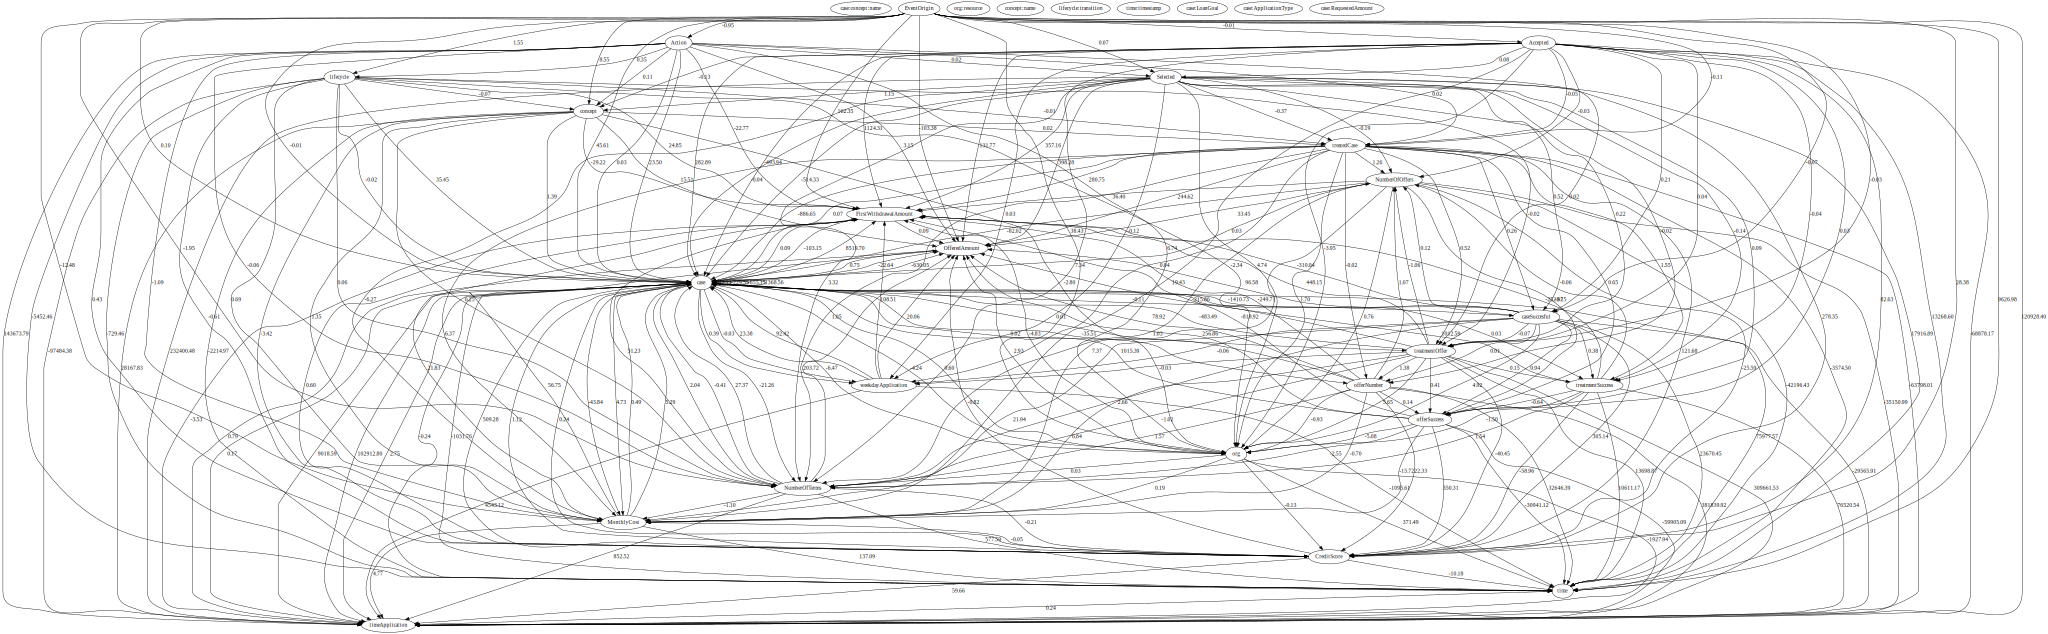

In [14]:
from causallearn.search.FCMBased import lingam
model = lingam.ICALiNGAM()
model.fit(data)

from causallearn.search.FCMBased.lingam.utils import make_dot
lingam_graph = make_dot(model.adjacency_matrix_, labels=labels)
lingam_graph

In [ ]:
file_path = 'lingam_graph'
file_format = 'png'
lingam_graph.render(file_path, format=file_format, cleanup=True)

In [ ]:
from causallearn.search.ScoreBased.GES import ges

# default parameters
Record = ges(data)
print(Record)

In [ ]:
# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd_ges = GraphUtils.to_pydot(Record['G'], labels=labels)
tmp_png = pyd_ges.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

In [11]:
import dowhy
from dowhy import CausalModel

import numpy as np
import pandas as pd
import graphviz
import networkx as nx 

def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.01
    dirs = np.where(idx)
    d = graphviz.Digraph(engine='dot')
    names = labels if labels else [f'x{i}' for i in range(len(adjacency_matrix))]
    for name in names:
        d.node(name)
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=str(coef))
    return d

def str_to_dot(string):
    '''
    Converts input string from graphviz library to valid DOT graph format.
    '''
    graph = string.strip().replace('\n', ';').replace('\t','')
    graph = graph[:9] + graph[10:-2] + graph[-1] # Removing unnecessary characters from string
    return graph

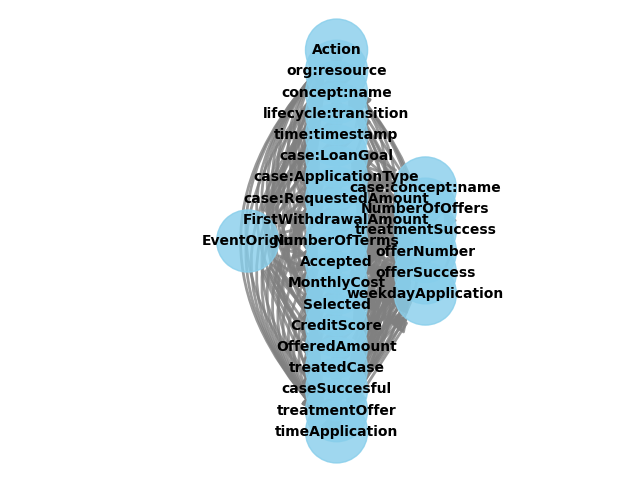

In [15]:
graph_dot = make_graph(model.adjacency_matrix_, labels=labels)

# Define Causal Model
causal_model=CausalModel(
        data = df,
        treatment='treatmentOffer',
        outcome='offerSuccess',
        graph=str_to_dot(graph_dot.source))

#print(graph_dot)
causal_model.view_model()

In [17]:
# Import the necessary libraries and functions for this demo
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.ensemble import GradientBoostingRegressor
from dowhy.gcm.falsify import FalsifyConst, falsify_graph, plot_local_insights, run_validations, apply_suggestions
from dowhy.gcm.independence_test.generalised_cov_measure import generalised_cov_based
from dowhy.gcm.util import plot
from dowhy.gcm.util.general import set_random_seed
from dowhy.gcm.ml import SklearnRegressionModel

#does not work for lingam_graph
result = falsify_graph(graph_dot, data, plot_histogram=True)
# Summarize the result
print(result)

AttributeError: 'Digraph' object has no attribute 'nodes'